In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read path with Pandas
Polarbear_data = pd.read_csv('CS_SB_PBearMeasurementData_1981_2017.csv')
Polarbear_data

,Collecting_Agency,Population,Date,BearID,Sex,Age,Total_Length,Standard_Length,Heart_Girth,Skull_Width,...,Unnamed: 16131,Unnamed: 16132,Unnamed: 16133,Unnamed: 16134,Unnamed: 16135,Unnamed: 16136,Unnamed: 16137,Unnamed: 16138,Unnamed: 16139,Unnamed: 16140
0,USGS,SB,4/9/82,1.0,M,17,218.0,no data,140.0,no data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,SB,5/4/86,1.0,M,21,240.0,219.4,149.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,SB,4/21/87,1.0,M,22,238.0,216.4,129.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,SB,4/6/87,2.0,F,18,212.0,196.5,127.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,SB,10/19/81,2.0,F,12,198.0,no data,175.0,no data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,USGS,SB,4/22/16,2293.0,F,10.0,no data,201.0,124.0,20.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3170,USGS,SB,4/25/10,2294.0,F,9.0,222.0,202.0,115.0,20.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get info on the Dataset
Polarbear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Columns: 16141 entries, Collecting_Agency to Unnamed: 16140
dtypes: float64(16120), object(21)
memory usage: 390.9+ MB


In [4]:
# Clean data to include date, BearID, Sex, Age, Mass, Total Length, and Numer of cubs
cleaned_polarbear = Polarbear_data[['Date','BearID', 'Sex', 'Age', 'Mass', 'Total_Length','Number_of_cubs']]
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs
0,4/9/82,1.0,M,17,267.6,218.0,NaN
1,5/4/86,1.0,M,21,no data,240.0,NaN
2,4/21/87,1.0,M,22,no data,238.0,NaN
3,4/6/87,2.0,F,18,no data,212.0,0.0
4,10/19/81,2.0,F,12,no data,198.0,2.0
...,...,...,...,...,...,...,...
3169,4/22/16,2293.0,F,10.0,202.3,no data,0.0
3170,4/25/10,2294.0,F,9.0,175.5,222.0,0.0
3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#added year column
cleaned_polarbear['Date'] = pd.to_datetime(cleaned_polarbear['Date'])
cleaned_polarbear['year'] = cleaned_polarbear['Date'].dt.year
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1.0,M,17,267.6,218.0,NaN,1982.0
1,1986-05-04,1.0,M,21,no data,240.0,NaN,1986.0
2,1987-04-21,1.0,M,22,no data,238.0,NaN,1987.0
3,1987-04-06,2.0,F,18,no data,212.0,0.0,1987.0
4,1981-10-19,2.0,F,12,no data,198.0,2.0,1981.0
...,...,...,...,...,...,...,...,...
3169,2016-04-22,2293.0,F,10.0,202.3,no data,0.0,2016.0
3170,2010-04-25,2294.0,F,9.0,175.5,222.0,0.0,2010.0
3171,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Convert 'Age', 'Mass', 'Total_Length', 'Number_of_cubs', and 'year' to float, turning 'no data' into NaN
cleaned_polarbear['Age'] = pd.to_numeric(cleaned_polarbear['Age'], errors='coerce')
cleaned_polarbear['Mass'] = pd.to_numeric(cleaned_polarbear['Mass'], errors='coerce')
cleaned_polarbear['Total_Length'] = pd.to_numeric(cleaned_polarbear['Total_Length'], errors='coerce')
cleaned_polarbear['Number_of_cubs'] = pd.to_numeric(cleaned_polarbear['Number_of_cubs'], errors='coerce')
cleaned_polarbear['year'] = pd.to_numeric(cleaned_polarbear['year'], errors='coerce')
cleaned_polarbear['BearID'] = pd.to_numeric(cleaned_polarbear['BearID'], errors='coerce')
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1.0,M,17.0,267.6,218.0,NaN,1982.0
1,1986-05-04,1.0,M,21.0,NaN,240.0,NaN,1986.0
2,1987-04-21,1.0,M,22.0,NaN,238.0,NaN,1987.0
3,1987-04-06,2.0,F,18.0,NaN,212.0,0.0,1987.0
4,1981-10-19,2.0,F,12.0,NaN,198.0,2.0,1981.0
...,...,...,...,...,...,...,...,...
3169,2016-04-22,2293.0,F,10.0,202.3,NaN,0.0,2016.0
3170,2010-04-25,2294.0,F,9.0,175.5,222.0,0.0,2010.0
3171,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Handling Missing Values
# Option 1: Drop rows with any missing values in 'Date', 'Sex', 'Number_of_cubs' or'Mass'
df_cleaned = cleaned_polarbear.dropna(subset=['Mass', 'Total_Length', 'year', 'Number_of_cubs'])
df_cleaned

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
5,1986-04-29,2.0,F,17.0,213.2,212.0,2.0,1986.0
7,1985-05-11,4.0,F,16.0,204.1,218.0,2.0,1985.0
11,1984-03-28,7.0,F,13.0,215.5,226.0,1.0,1984.0
12,1991-04-08,8.0,F,22.0,206.4,218.5,0.0,1991.0
13,1992-04-14,8.0,F,23.0,158.8,231.0,2.0,1992.0
...,...,...,...,...,...,...,...,...
3145,2010-04-14,2275.0,F,10.0,160.6,221.0,2.0,2010.0
3152,2010-04-12,2280.0,F,8.0,169.6,220.0,2.0,2010.0
3153,2011-04-02,2280.0,F,9.0,161.0,216.3,2.0,2011.0
3166,2009-05-08,2290.0,F,10.0,195.5,226.0,0.0,2009.0


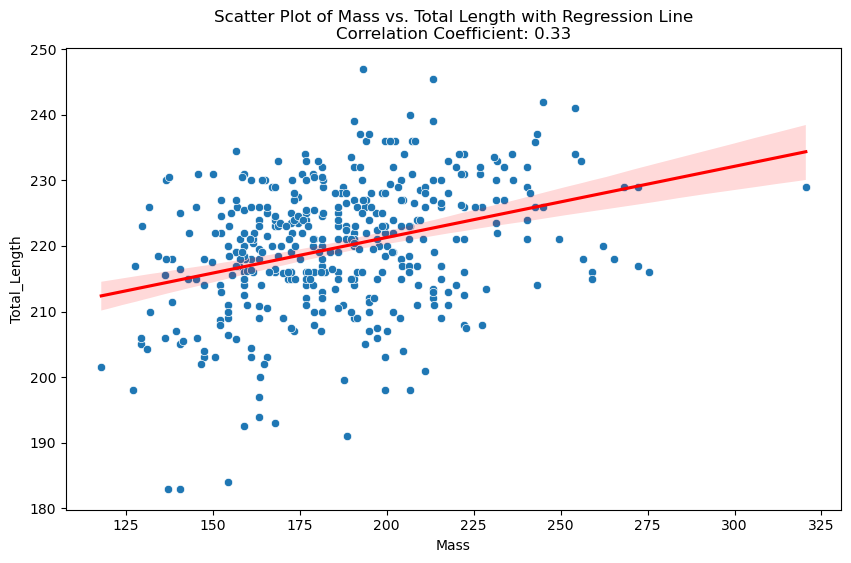

In [8]:
#Sample Graph
import seaborn as sns
import matplotlib.pyplot as plt


correlation_coefficient = df_cleaned['Mass'].corr(df_cleaned['Total_Length'])

# Now, create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mass', y='Total_Length', data=df_cleaned)
sns.regplot(x='Mass', y='Total_Length', data=df_cleaned, scatter=False, color='red')

# Add correlation coefficient to the plot
plt.title(f'Scatter Plot of Mass vs. Total Length with Regression Line\nCorrelation Coefficient: {correlation_coefficient:.2f}')

# Show the plot
plt.show()



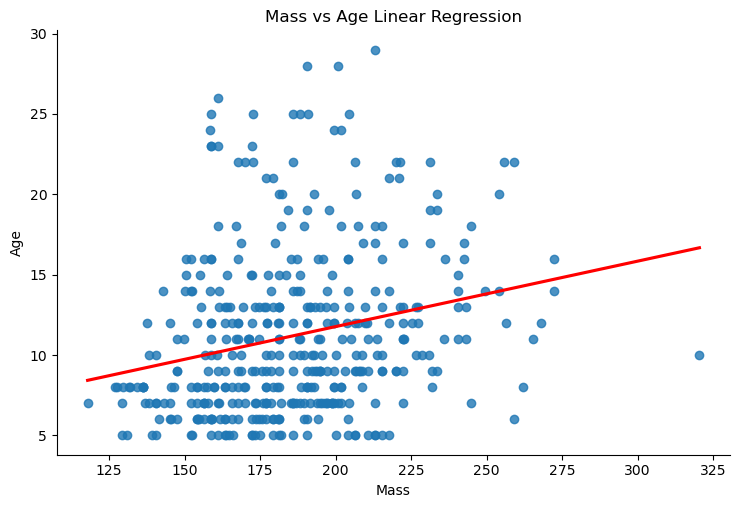

In [9]:
#Sample Graph # 2
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a linear regression line
sns.lmplot(x='Mass', y='Age', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Mass vs Age Linear Regression')
plt.xlabel('Mass')
plt.ylabel('Age')

# Show the plot
plt.show()


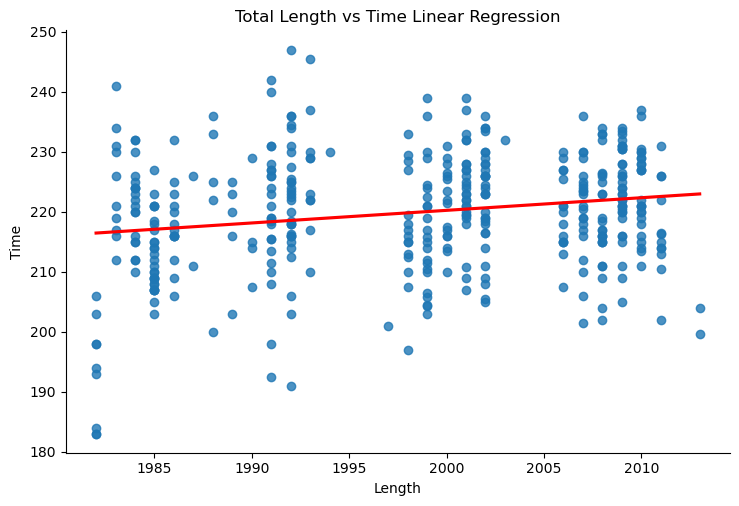

In [10]:
#Sample Graph # 3

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a linear regression line
sns.lmplot(x='year', y='Total_Length', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Total Length vs Time Linear Regression')
plt.xlabel('Length')
plt.ylabel('Time')

# Show the plot
plt.show()
import warnings

# Suppress Seaborn warning about figure layout change
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

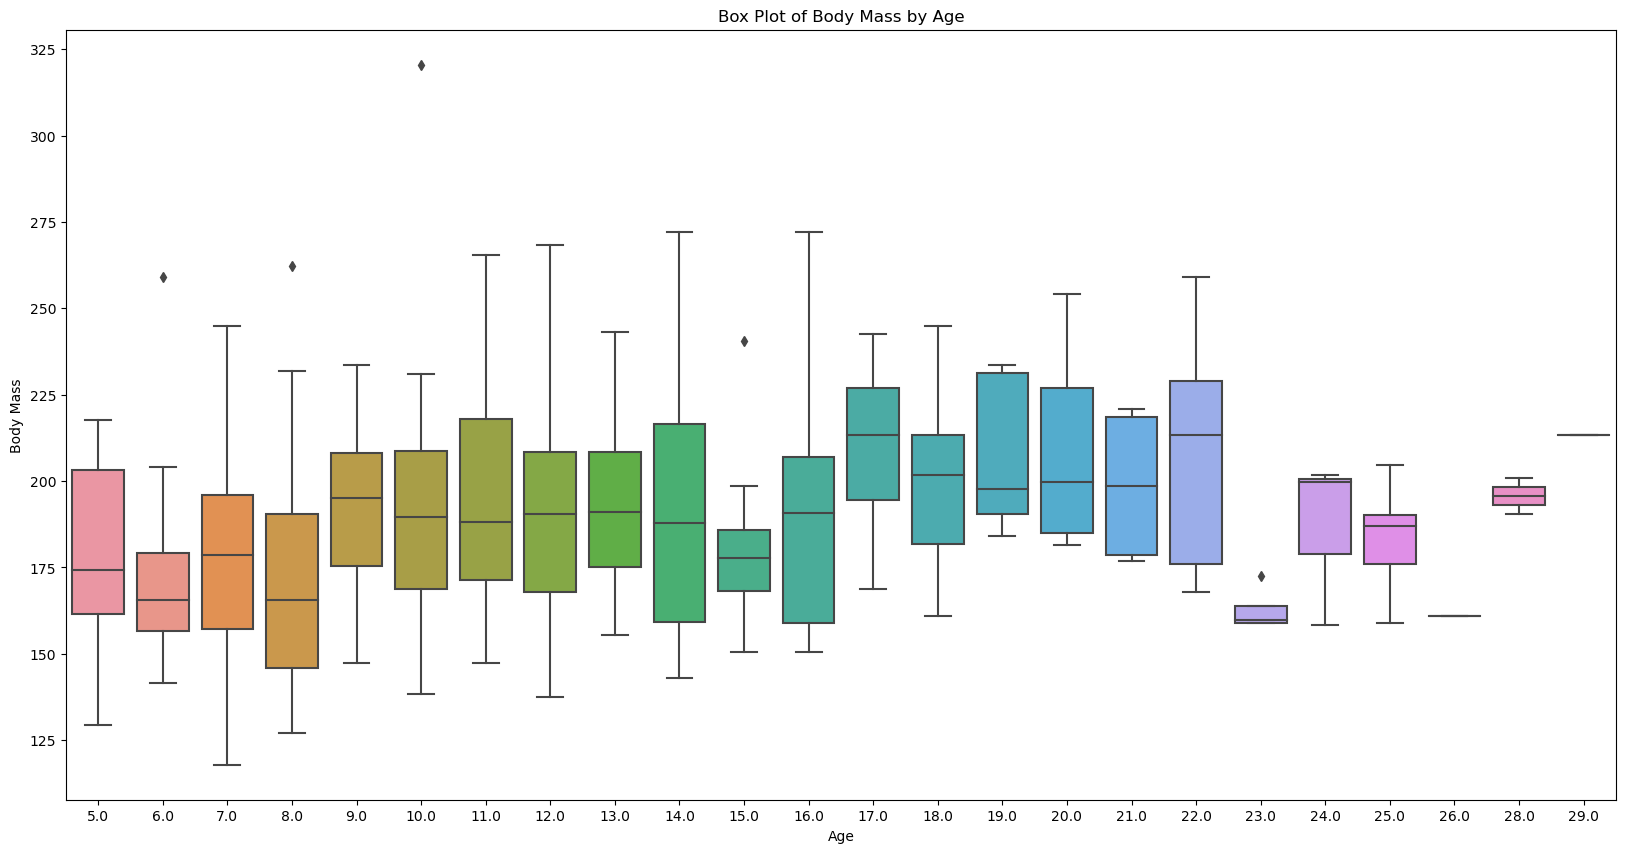

In [11]:
#Example of Boxplot
import seaborn as sns
import matplotlib.pyplot as plt



# Create a box plot of mass by sex and age
plt.figure(figsize=(20, 10))
sns.boxplot(x='Age', y='Mass',  data=df_cleaned)

# Add title and labels
plt.title('Box Plot of Body Mass by Age')
plt.xlabel('Age')
plt.ylabel('Body Mass')

# Show the plot
plt.show()


Distribution of Male vs. Female
Distribution of Female vs Female with Cubs

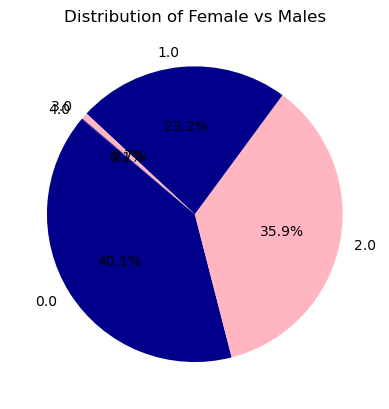

In [12]:
# Counting the number of female and male Bears
sex_distribution = cleaned_polarbear['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Males')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

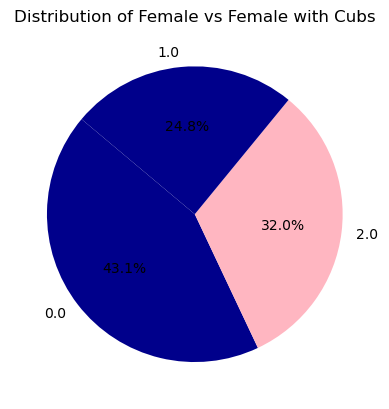

In [13]:
# Counting the number of female and females with cubs
sex_distribution = df_cleaned['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Female with Cubs')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

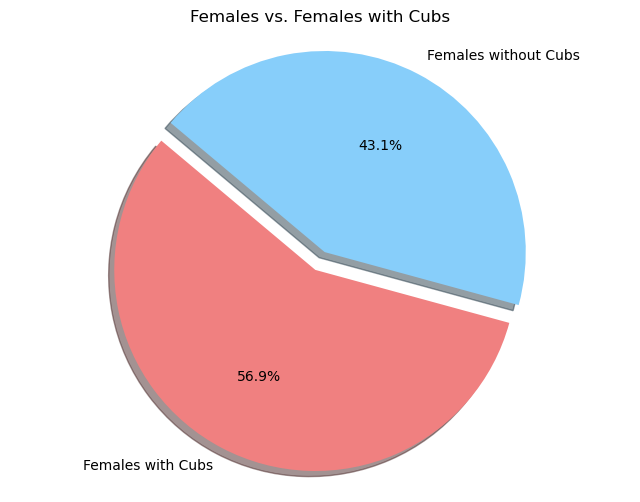

In [14]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'Sex' and 'Number_of_cubs' columns
# Filter the DataFrame for only females
females = df_cleaned[df_cleaned['Sex'] == 'F']

# Determine the count of females without cubs and with cubs
females_with_cubs = females[females['Number_of_cubs'] > 0].shape[0]
females_without_cubs = females[females['Number_of_cubs'] == 0].shape[0]

# Data to plot
labels = 'Females with Cubs', 'Females without Cubs'
sizes = [females_with_cubs, females_without_cubs]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# label the graph
plt.title('Females vs. Females with Cubs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# show the graph
plt.show()


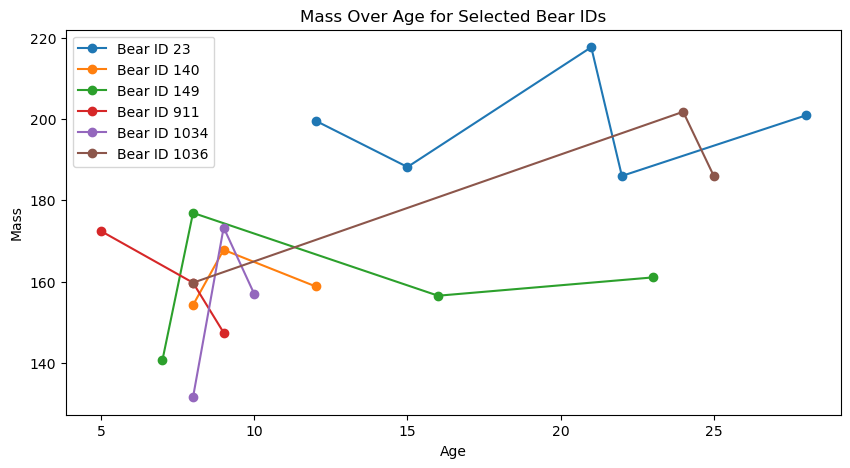

In [15]:
#Line plot age vs Mass
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
selected_bear_ids = [23, 140, 149, 911, 1034, 1036,]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('Age')

# Plotting 'Year' vs 'Mass' for each Bear ID
plt.figure(figsize=(10,5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['Age'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Adding title and labels
plt.title('Mass Over Age for Selected Bear IDs')
plt.xlabel('Age')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()


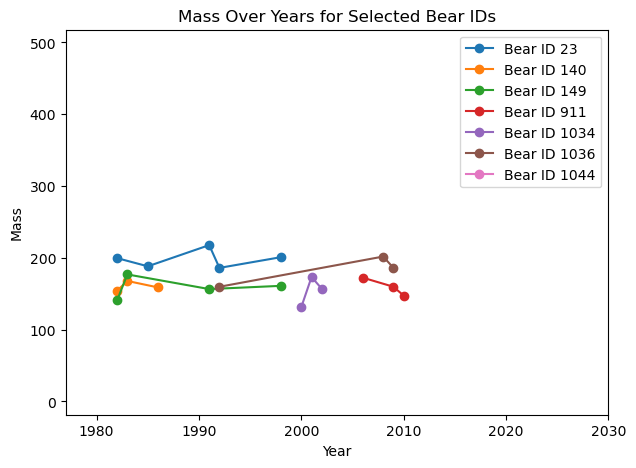

In [16]:
import matplotlib.pyplot as plt


selected_bear_ids = [23, 140, 149, 911, 1034, 1036, 1044]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('year')

# Increase the figure size for better visibility
plt.figure(figsize=(7, 5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['year'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Expand the x and y limits if needed to include more data
plt.xlim(min(selected_bears_sorted['year']) - 5, max(selected_bears_sorted['year']) + 20)
plt.ylim(min(selected_bears_sorted['Mass']) - 150, max(selected_bears_sorted['Mass']) + 300)

# Adding title and labels
plt.title('Mass Over Years for Selected Bear IDs')
plt.xlabel('Year')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()
